In [48]:
from utils import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
train_x_orig, train_y, test_x_orig, test_y, classes=load_data()


y = 0. It's a non-cat picture.


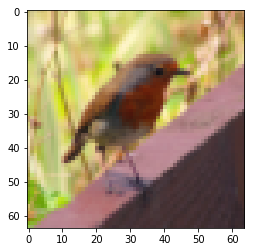

In [51]:
#showing image in a dataset
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [52]:
#Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of Training Examples: " + str(m_train))
print("Number of Testing Examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))


Number of Training Examples: 209
Number of Testing Examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [53]:
#Reshape the Training and Test Examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

#standardize data to have feature values between 0 and 1
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [54]:
#2 Layer Neural Network
#Constant defining the model
n_x = 12288
n_h = 7
n_y = 1
layer_dims= (n_x, n_h, n_y)


In [58]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations= 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layer_dims
    #Initialize parameters dictionary
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    #Getting W1, b1, W2, b2 from the dictionary parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Loop Gradient Descent
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        #compute cost
        cost = compute_cost(A2, Y)
        
        #initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        #backward propagation
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        #update parameters
        
        parameters = update_parameters(parameters, grads, learning_rate)
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
        
        
    
    

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213018
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466097
Cost after iteration 1500: 0.17448318112556635
Cost after iteration 1600: 0.1708076297809551
Cost after iteration 1700: 0.11306524562164742
Cost after iteration 1800: 0.09629426845937158
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.0743907870431908
Cost after iteration 2100: 0.06630748132267

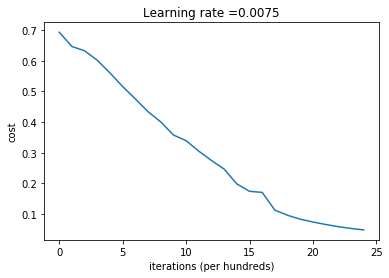

In [59]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [60]:
#L Layer Neural Network
#constants
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [65]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    #parameters initialization
    parameters = initialize_parameters_deep(layer_dims)
    
    #loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
    

Cost after iteration 0: 0.692380
Cost after iteration 100: 0.646159
Cost after iteration 200: 0.631775
Cost after iteration 300: 0.600091
Cost after iteration 400: 0.559427
Cost after iteration 500: 0.512988
Cost after iteration 600: 0.454815
Cost after iteration 700: 0.399388
Cost after iteration 800: 0.420515
Cost after iteration 900: 0.369184
Cost after iteration 1000: 0.362393
Cost after iteration 1100: 0.341366
Cost after iteration 1200: 0.333344
Cost after iteration 1300: 0.263797
Cost after iteration 1400: 0.164805
Cost after iteration 1500: 0.143608
Cost after iteration 1600: 0.124467
Cost after iteration 1700: 0.706752
Cost after iteration 1800: 0.092394
Cost after iteration 1900: 0.078572
Cost after iteration 2000: 0.068092
Cost after iteration 2100: 0.059649
Cost after iteration 2200: 0.052619
Cost after iteration 2300: 0.046817
Cost after iteration 2400: 0.041928


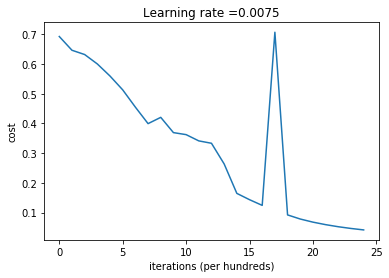

In [66]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)